In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
haq = pd.read_excel('C:\\Users\\user\\Downloads\\HAQ19_sortedregion.xlsx')
labor = pd.read_excel('C:\\Users\\user\\Downloads\\raw labor and region .xlsx')

In [3]:
labor = labor.drop(columns=['Income Group'])
labor = labor.rename(columns={'Entity':'Country'})

In [4]:
labor.head(10)

Country Code  Year  Productivity: output per hour worked  \
0  Albania  ALB  2005                             10.353054   
1  Albania  ALB  2006                             11.228283   
2  Albania  ALB  2007                             11.995945   
3  Albania  ALB  2008                             14.754907   
4  Albania  ALB  2009                             15.838745   
5  Albania  ALB  2010                             16.740137   
6  Albania  ALB  2011                             19.475384   
7  Albania  ALB  2012                             17.850225   
8  Albania  ALB  2013                             16.885489   
9  Albania  ALB  2014                             19.126170   

                 Region   
0  Europe & Central Asia  
1  Europe & Central Asia  
2  Europe & Central Asia  
3  Europe & Central Asia  
4  Europe & Central Asia  
5  Europe & Central Asia  
6  Europe & Central Asia  
7  Europe & Central Asia  
8  Europe & Central Asia  
9  Europe & Central Asia

In [5]:
umerged=pd.read_excel('C:\\Users\\user\\Downloads\\Mergedhaq.xlsx')

In [6]:
umerged.head()

Country  Year  Healthcare Access and Quality Index (HAQ)  \
0  Afghanistan  2000                                  37.800000   
1  Afghanistan  2005                                  41.400000   
2  Afghanistan  2010                                  44.700000   
3  Afghanistan  2015                                  47.600000   
4  Afghanistan  2019                                  28.866354   

                                              Region  \
0  Middle East, North Africa, Afghanistan & Pakistan   
1  Middle East, North Africa, Afghanistan & Pakistan   
2  Middle East, North Africa, Afghanistan & Pakistan   
3  Middle East, North Africa, Afghanistan & Pakistan   
4  Middle East, North Africa, Afghanistan & Pakistan   

   Productivity: output per hour worked  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN

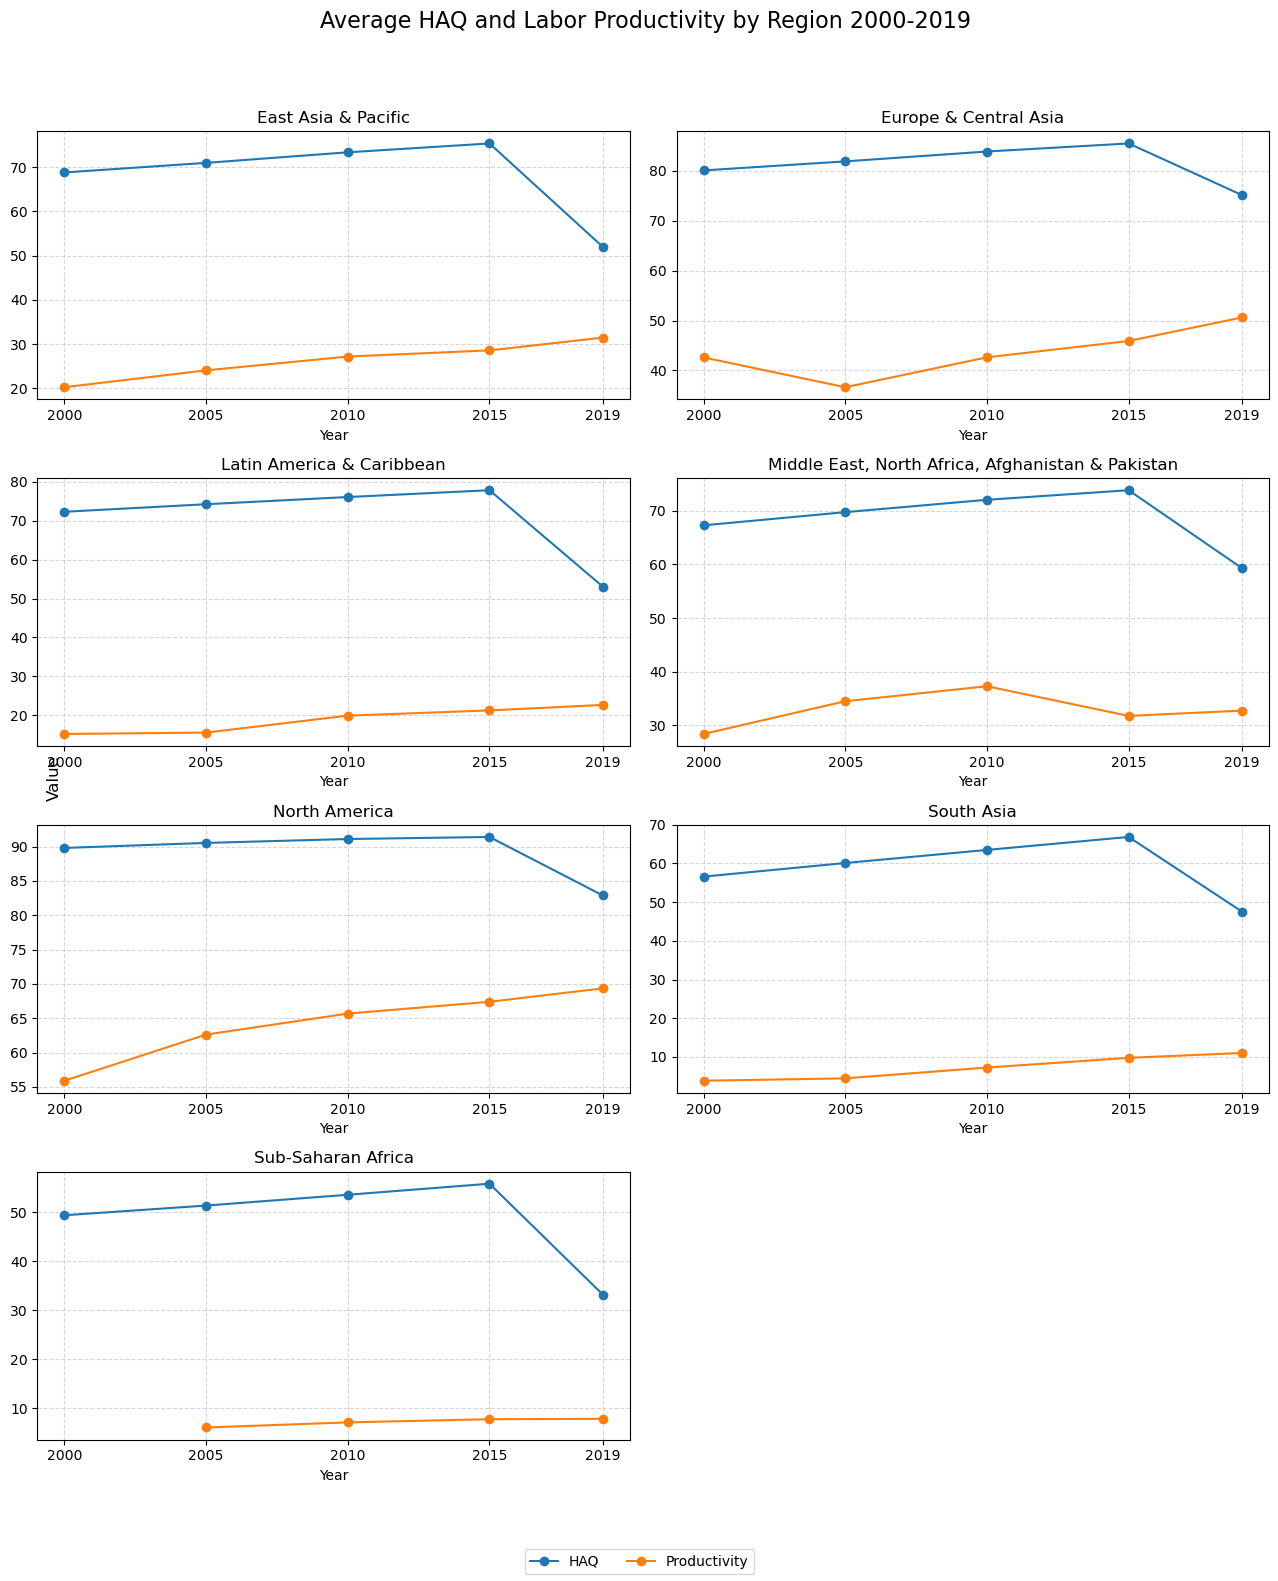

In [25]:
import matplotlib.pyplot as plt

# We assume df_filtered already exists

# Group to get averages per Region per Year
region_year = (
    umerged.groupby(["Region", "Year"])
               [["Healthcare Access and Quality Index (HAQ)",
                 "Productivity: output per hour worked"]]
               .mean()
               .reset_index()
)

regions = region_year["Region"].unique()

# Create 3 rows × 2 columns subplots
fig, axes = plt.subplots(4, 2, figsize=(13, 16))
axes = axes.flatten()

for ax, region in zip(axes, regions):
    subset = region_year[region_year["Region"] == region]

    ax.plot(subset["Year"], subset["Healthcare Access and Quality Index (HAQ)"],
            marker="o", label="HAQ")

    ax.plot(subset["Year"], subset["Productivity: output per hour worked"],
            marker="o", label="Productivity")

    ax.set_title(region, fontsize=12)
    ax.set_xlabel("Year")
    ax.set_xticks([2000, 2005, 2010, 2015, 2019])
    ax.grid(True, linestyle="--", alpha=0.5)

# Shared Y label
fig.text(0.04, 0.5, "Value", va="center", rotation="vertical", fontsize=12)

# One main title
fig.suptitle("Average HAQ and Labor Productivity by Region 2000-2019", fontsize=16)

# ---- SINGLE LEGEND for whole figure ----
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2)

# Adjust layout so legend fits
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

# Hide unused axes
for ax in axes[len(regions):]:
    ax.set_visible(False)


# ---- SAVE FIGURE HERE ----
plt.savefig("HAQ_ProductivityRegionbeit.png", dpi=300, bbox_inches="tight")

plt.show()


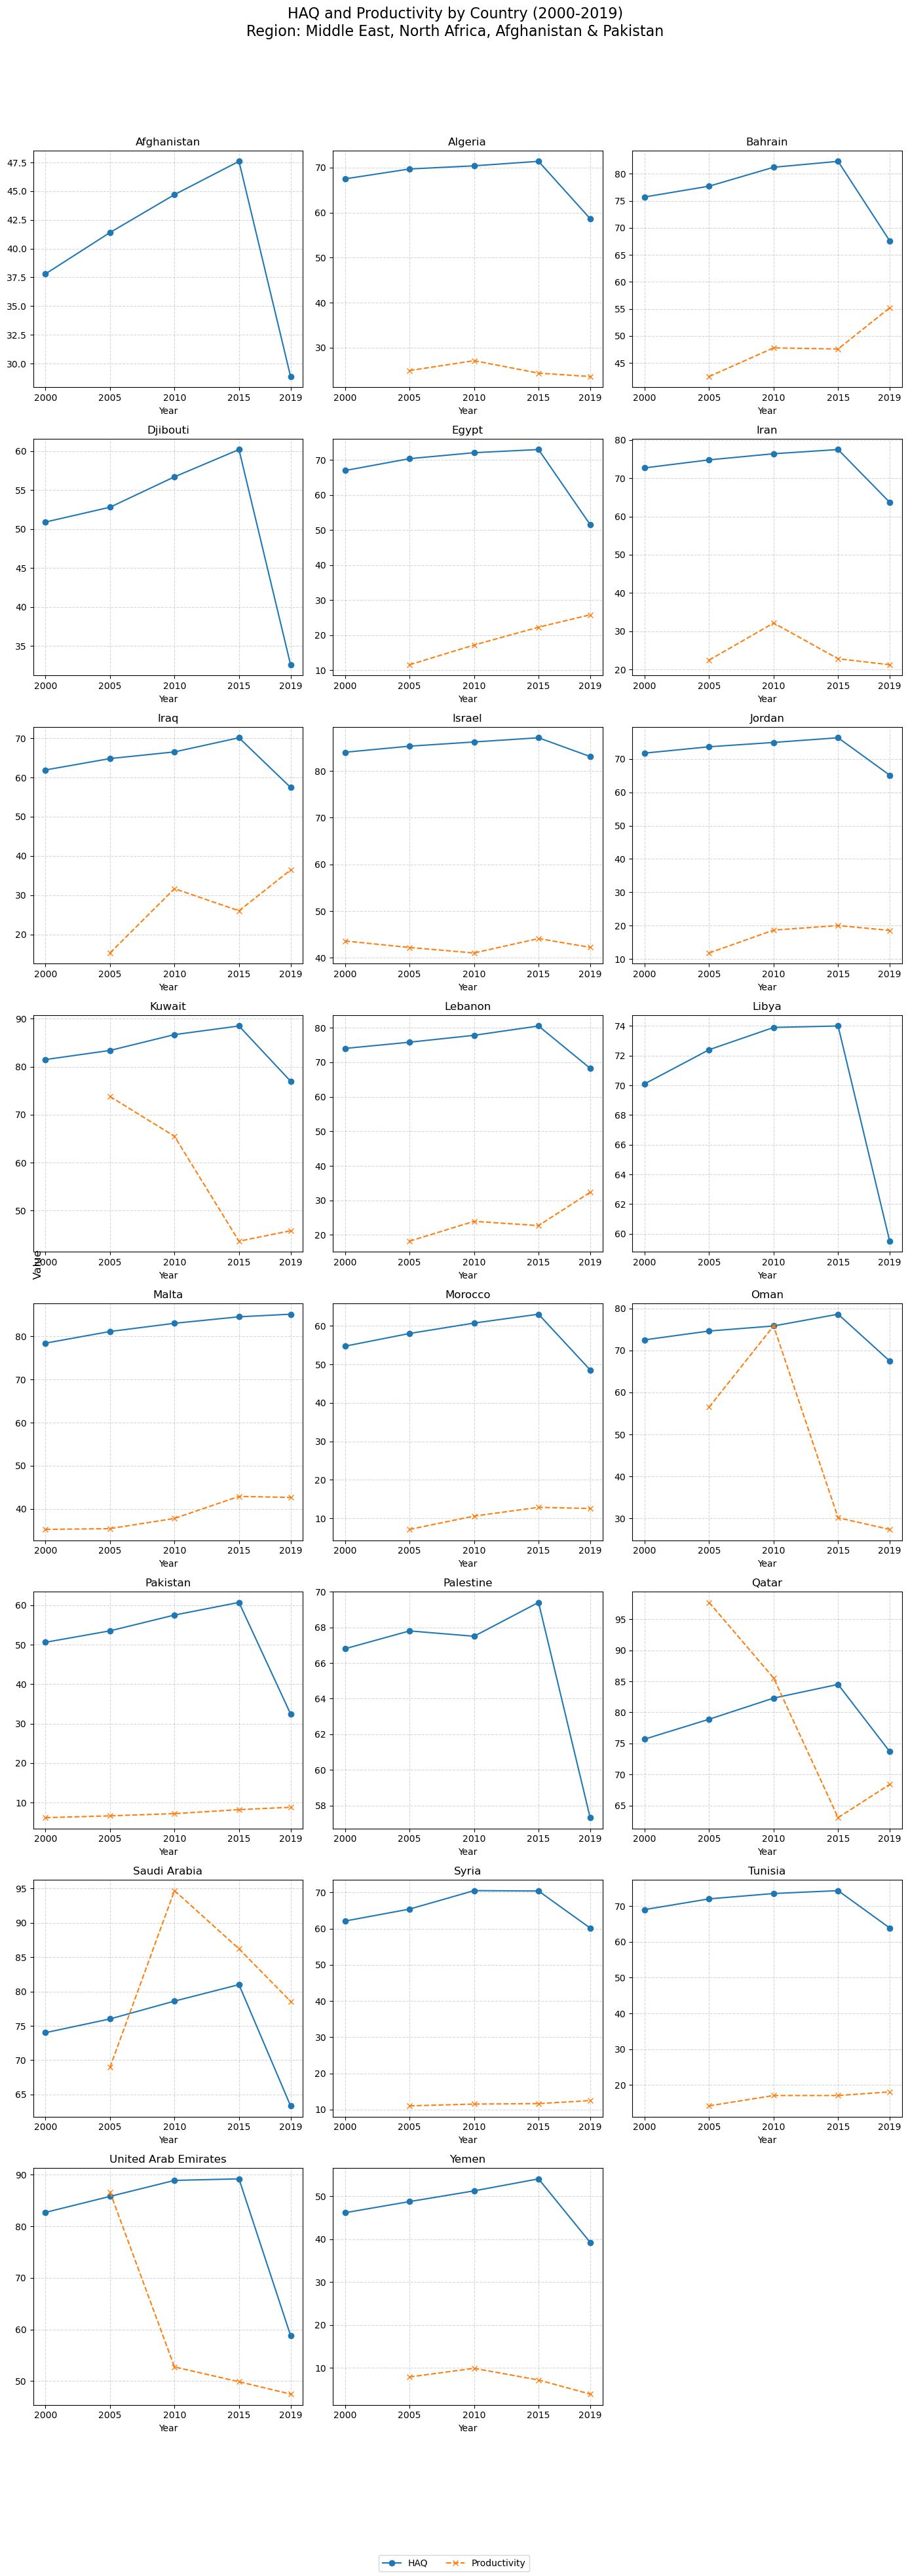

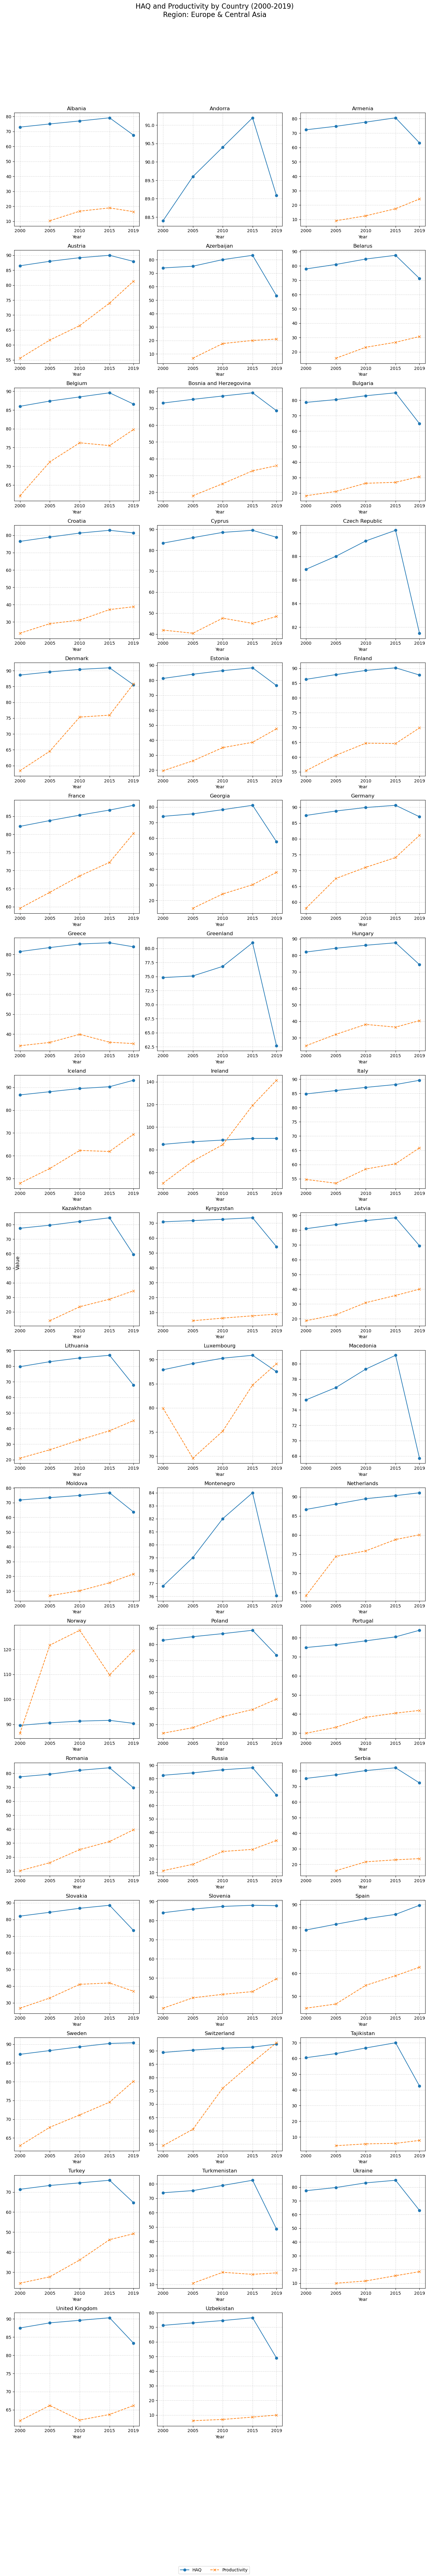

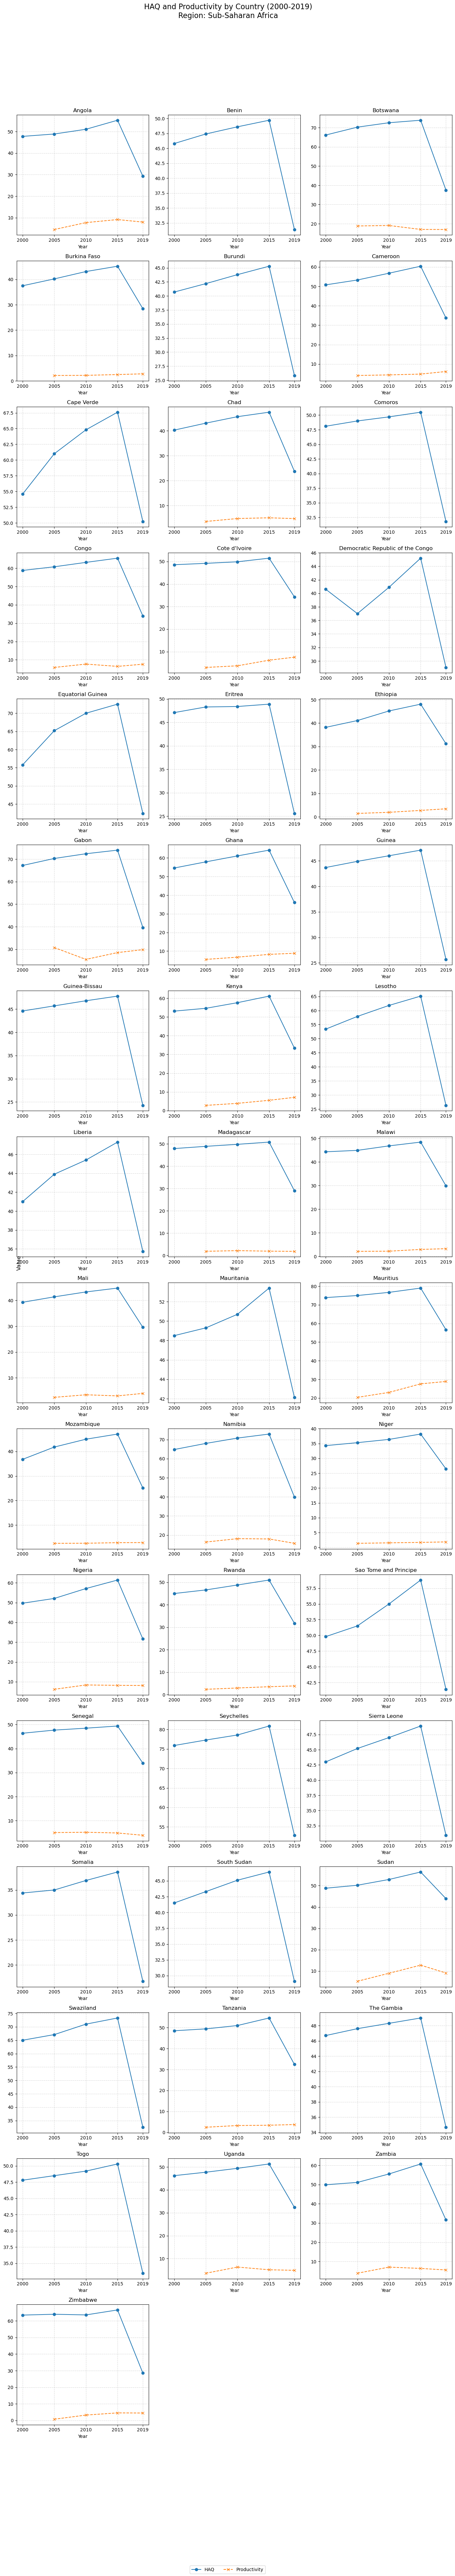

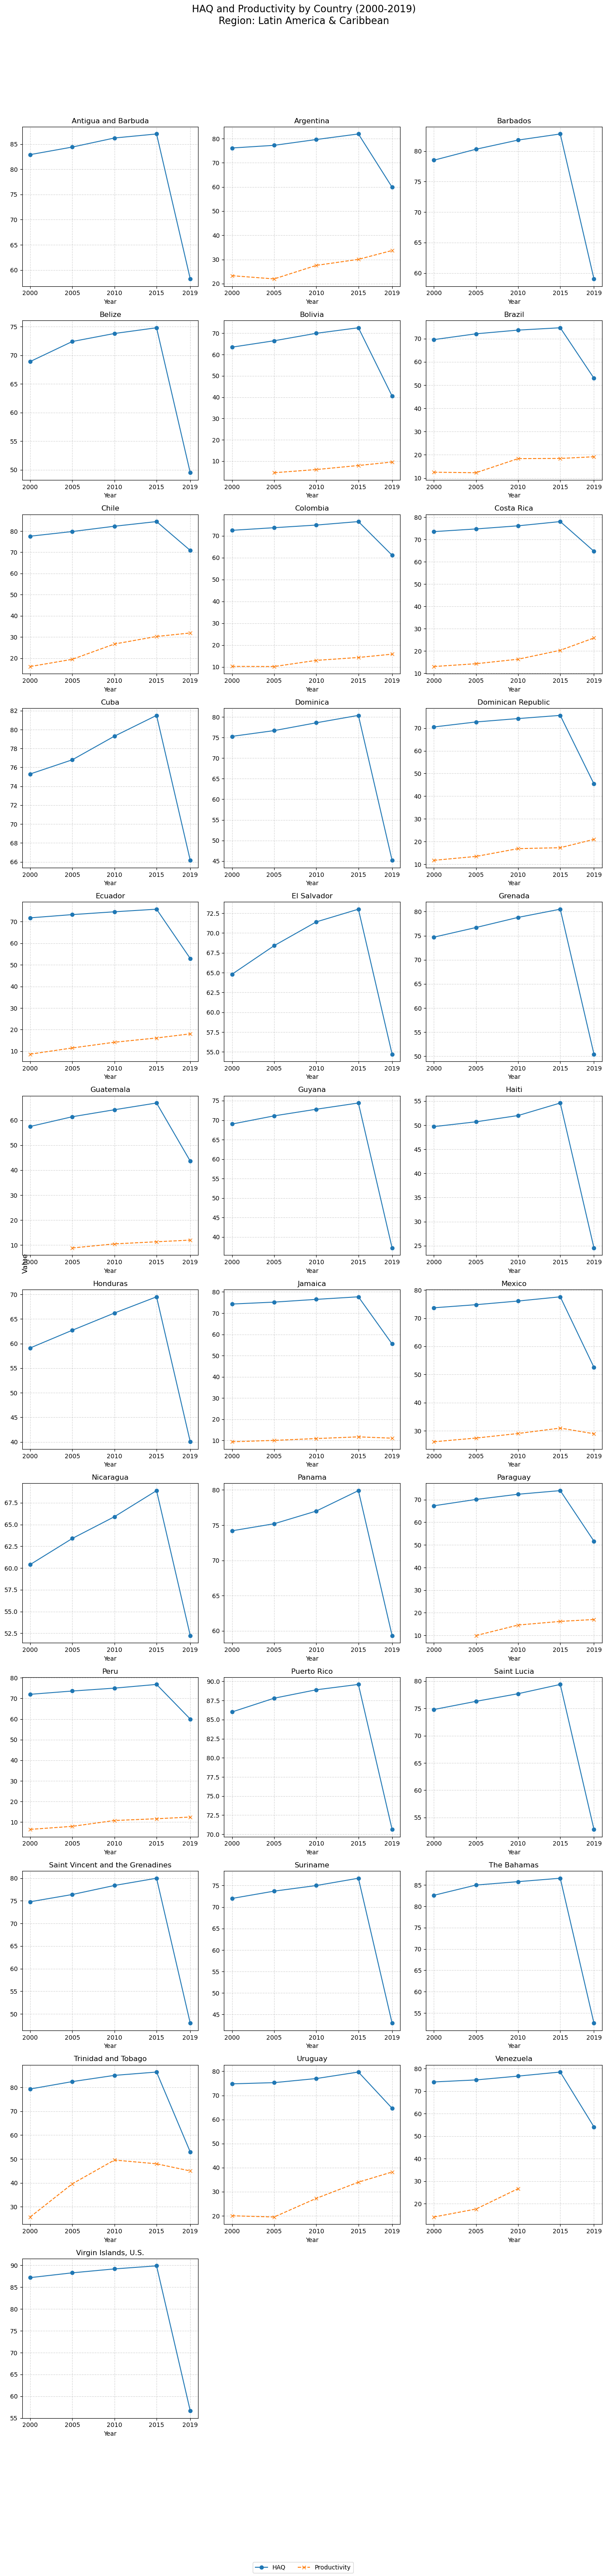

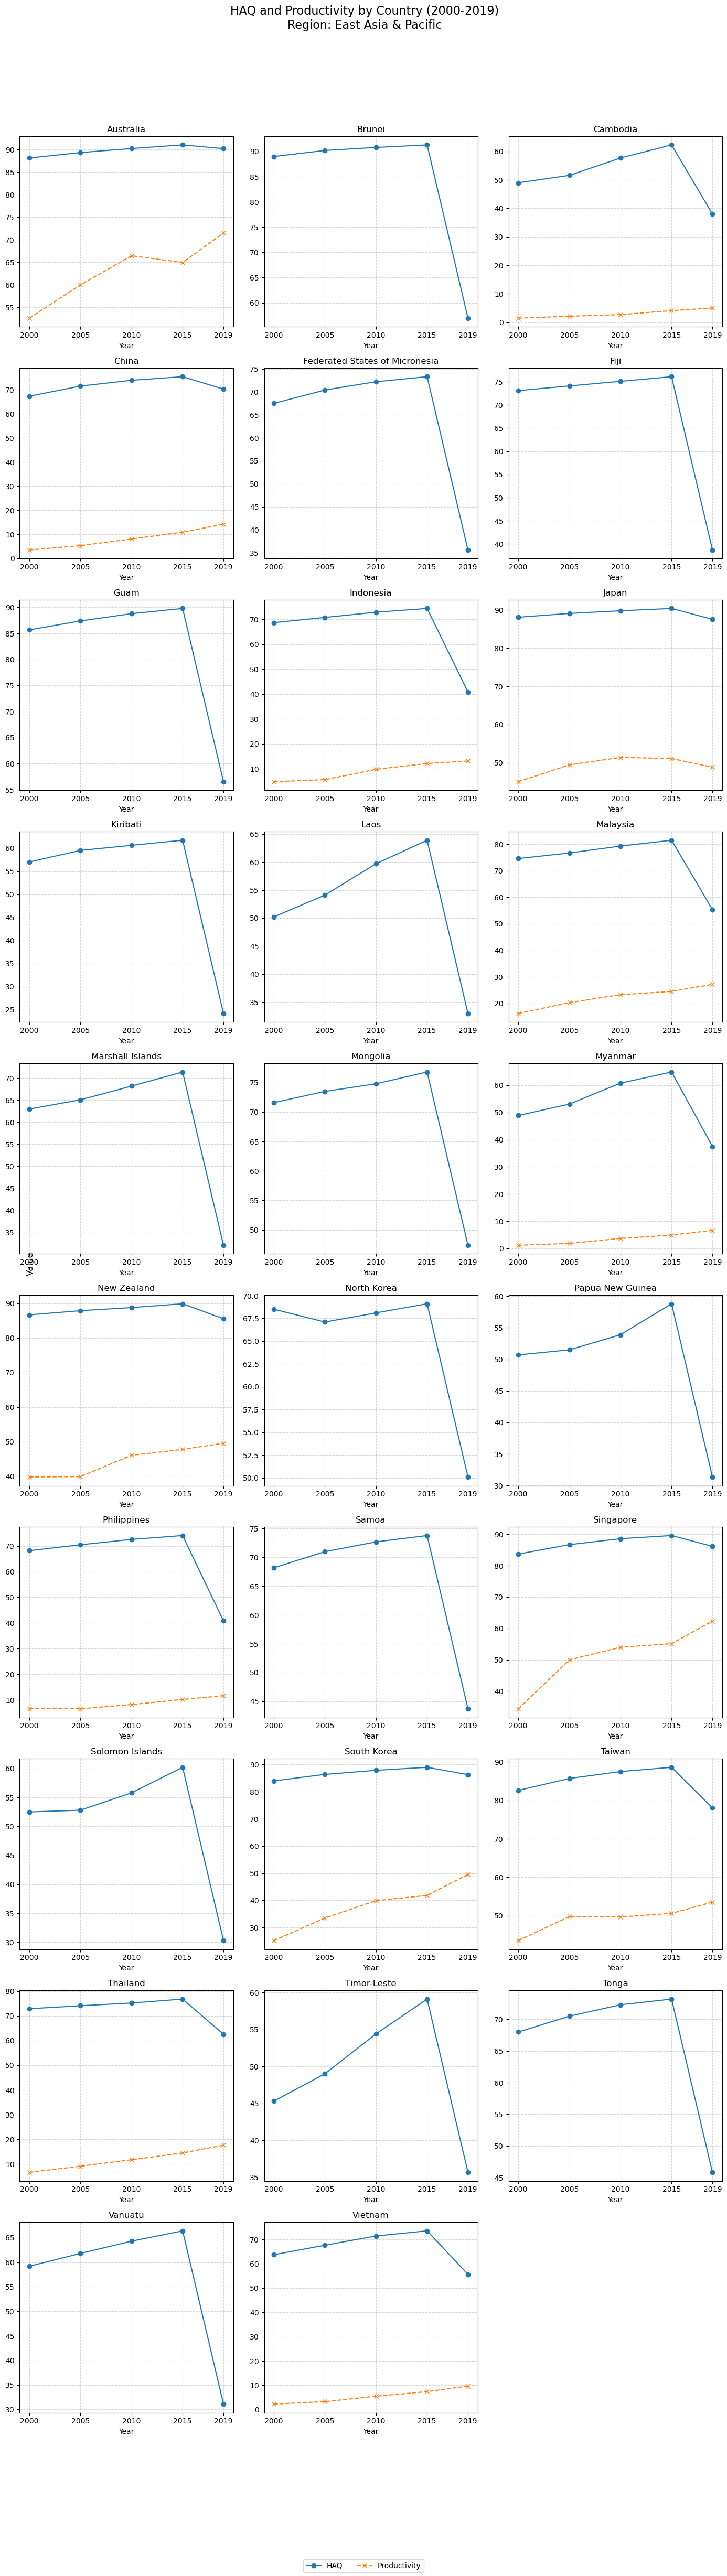

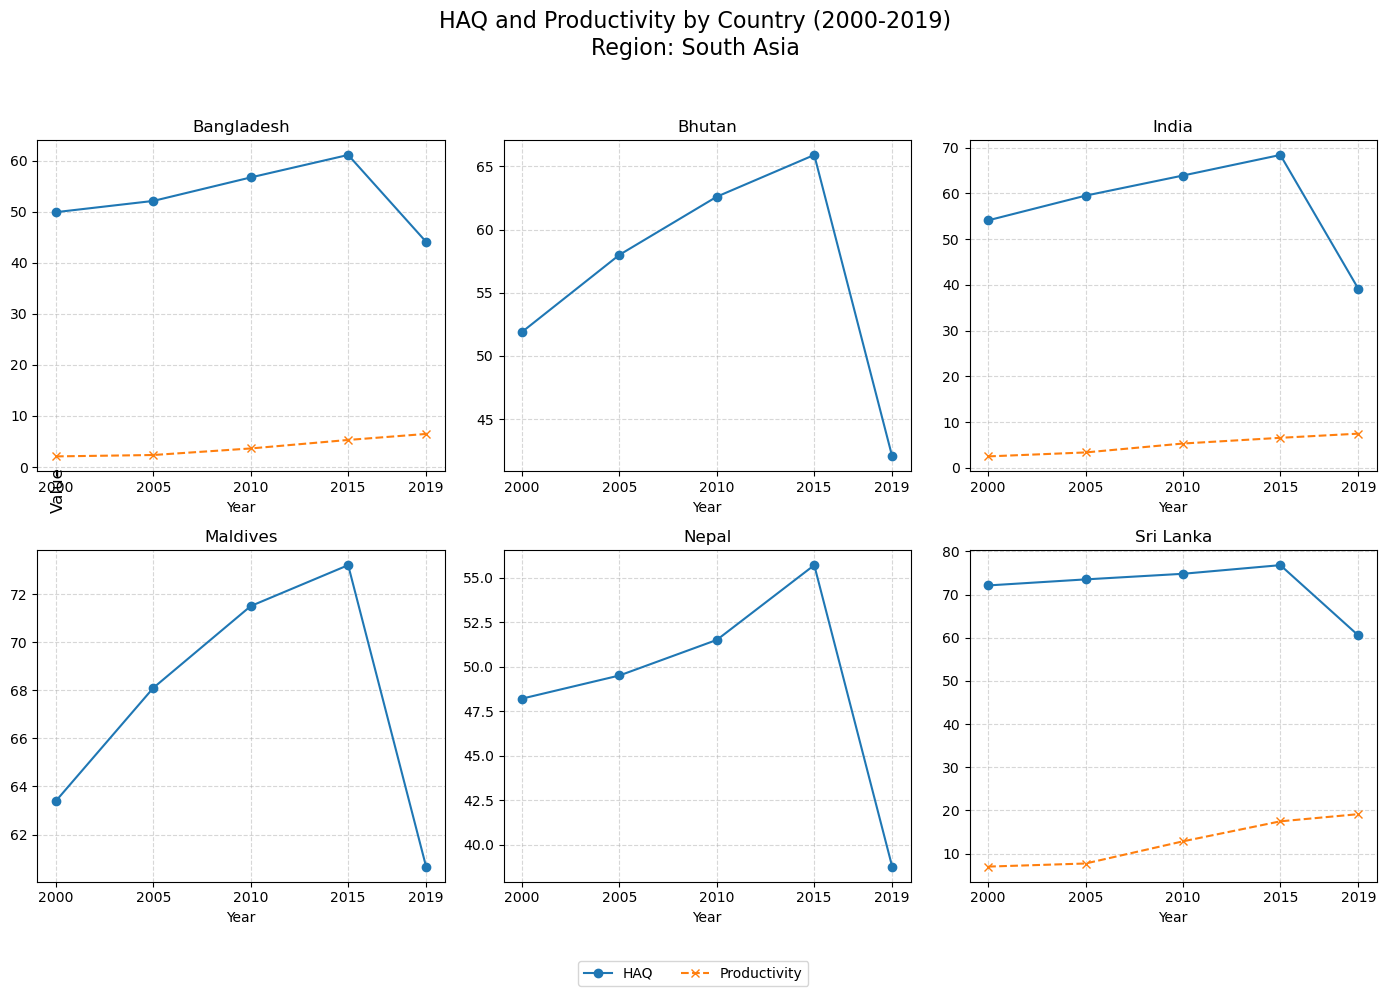

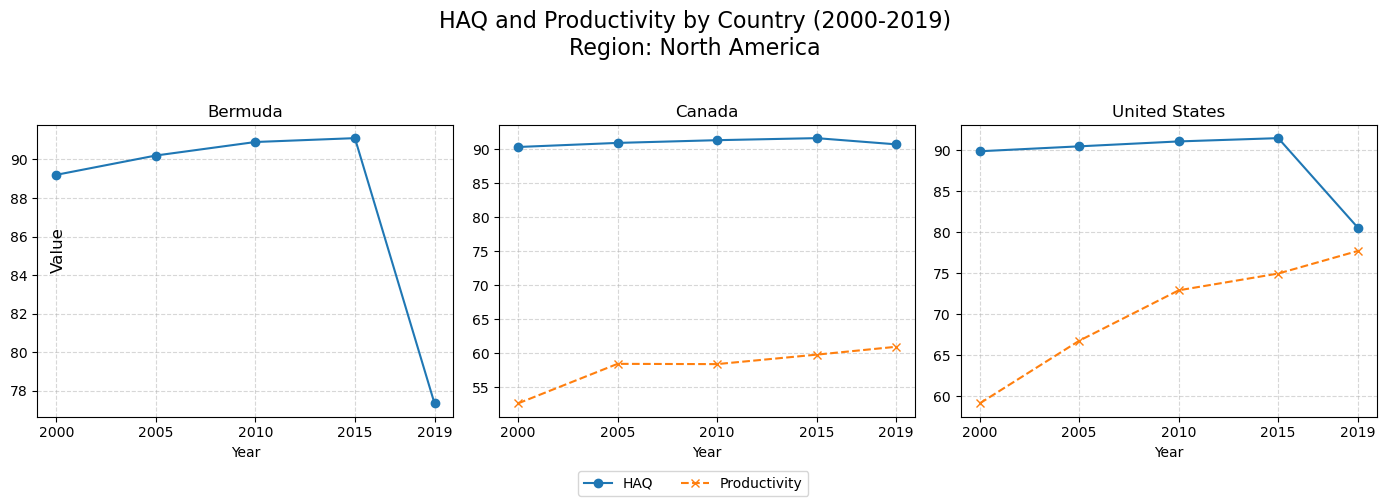

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import math

regions = umerged["Region"].unique()

for region in regions:

    # Subset for only this region
    reg = umerged[umerged["Region"] == region]

    countries = reg["Country"].unique()
    n = len(countries)

    # Determine subplot grid size (2 columns)
    ncols = 3
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 5 * nrows))
    axes = axes.flatten()  # flatten for easy iteration

    for ax, country in zip(axes, countries):
        sub = reg[reg["Country"] == country]

        # Plot HAQ
        ax.plot(sub["Year"],
                sub["Healthcare Access and Quality Index (HAQ)"],
                marker="o", label="HAQ")

        # Plot Productivity
        ax.plot(sub["Year"],
                sub["Productivity: output per hour worked"],
                marker="x", linestyle="--", label="Productivity")

        ax.set_title(country, fontsize=12)
        ax.set_xlabel("Year")
        ax.set_xticks([2000, 2005, 2010, 2015, 2019])
        ax.grid(True, linestyle="--", alpha=0.5)

    # Remove empty axes (if region has odd number of countries)
    for i in range(len(countries), len(axes)):
        fig.delaxes(axes[i])

    # Shared labels and title
    fig.text(0.04, 0.5, "Value", va="center", rotation="vertical", fontsize=12)
    fig.suptitle(f"HAQ and Productivity by Country (2000-2019)\nRegion: {region}", fontsize=16)

    # One global legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", ncol=2)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])

    # Save figure
    filename = f"Region_{region.replace(' ', '_')}_no2000wcountries.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")

    plt.show()

    

In [14]:
df_cleaned2 = umerged.groupby("Country").filter(
    lambda g: g["Productivity: output per hour worked"].notna().any()
)

In [13]:
df_cleaned2['Country'].nunique()

125

In [23]:
df_cleaned2.to_excel("HAQ_Labor_2000e.xlsx", index=False)

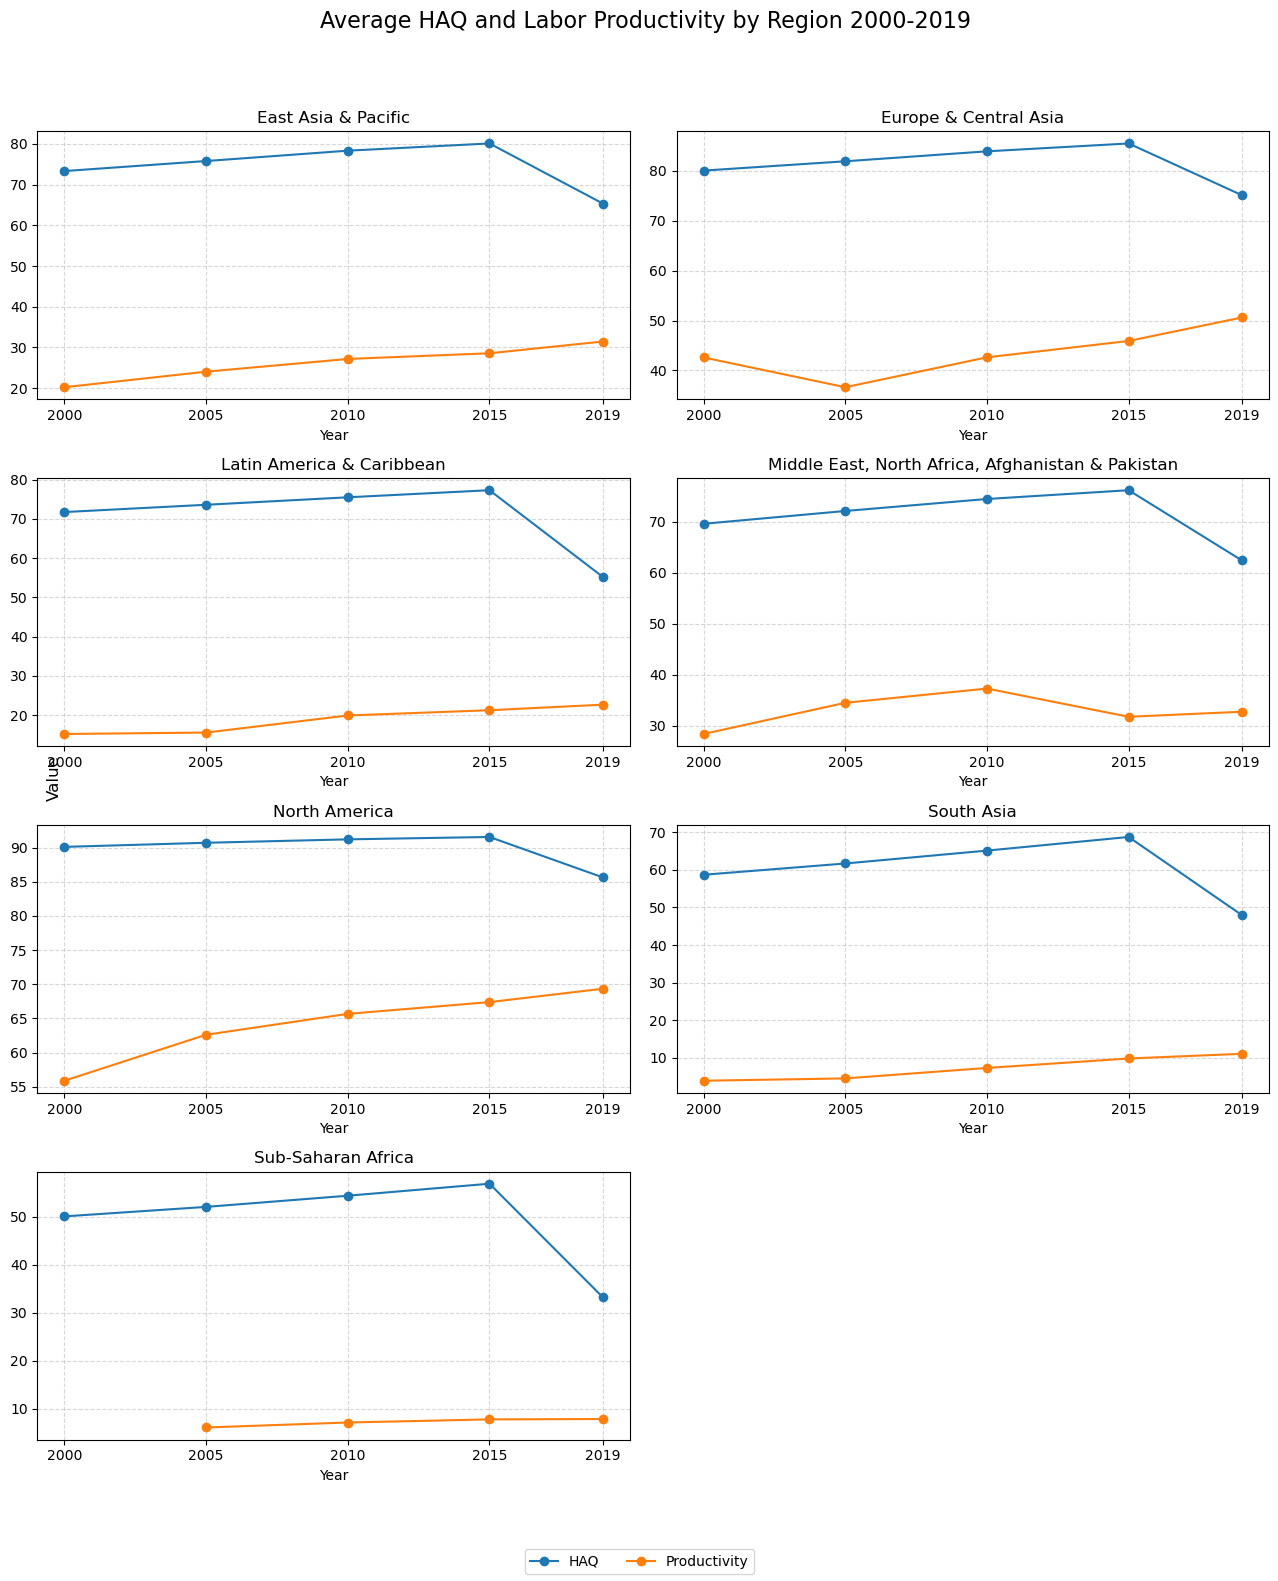

In [26]:
import matplotlib.pyplot as plt

# We assume df_filtered already exists

# Group to get averages per Region per Year
region_year = (
    df_cleaned2.groupby(["Region", "Year"])
               [["Healthcare Access and Quality Index (HAQ)",
                 "Productivity: output per hour worked"]]
               .mean()
               .reset_index()
)

regions = region_year["Region"].unique()

# Create 3 rows × 2 columns subplots
fig, axes = plt.subplots(4, 2, figsize=(13, 16))
axes = axes.flatten()

for ax, region in zip(axes, regions):
    subset = region_year[region_year["Region"] == region]

    ax.plot(subset["Year"], subset["Healthcare Access and Quality Index (HAQ)"],
            marker="o", label="HAQ")

    ax.plot(subset["Year"], subset["Productivity: output per hour worked"],
            marker="o", label="Productivity")

    ax.set_title(region, fontsize=12)
    ax.set_xlabel("Year")
    ax.set_xticks([2000, 2005, 2010, 2015, 2019])
    ax.grid(True, linestyle="--", alpha=0.5)

# Shared Y label
fig.text(0.04, 0.5, "Value", va="center", rotation="vertical", fontsize=12)

# One main title
fig.suptitle("Average HAQ and Labor Productivity by Region 2000-2019", fontsize=16)

# ---- SINGLE LEGEND for whole figure ----
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2)

# Adjust layout so legend fits
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

# Hide unused axes
for ax in axes[len(regions):]:
    ax.set_visible(False)


# ---- SAVE FIGURE HERE ----
plt.savefig("HAQ_Productivity_by_Regionbeit2.png", dpi=300, bbox_inches="tight")

plt.show()


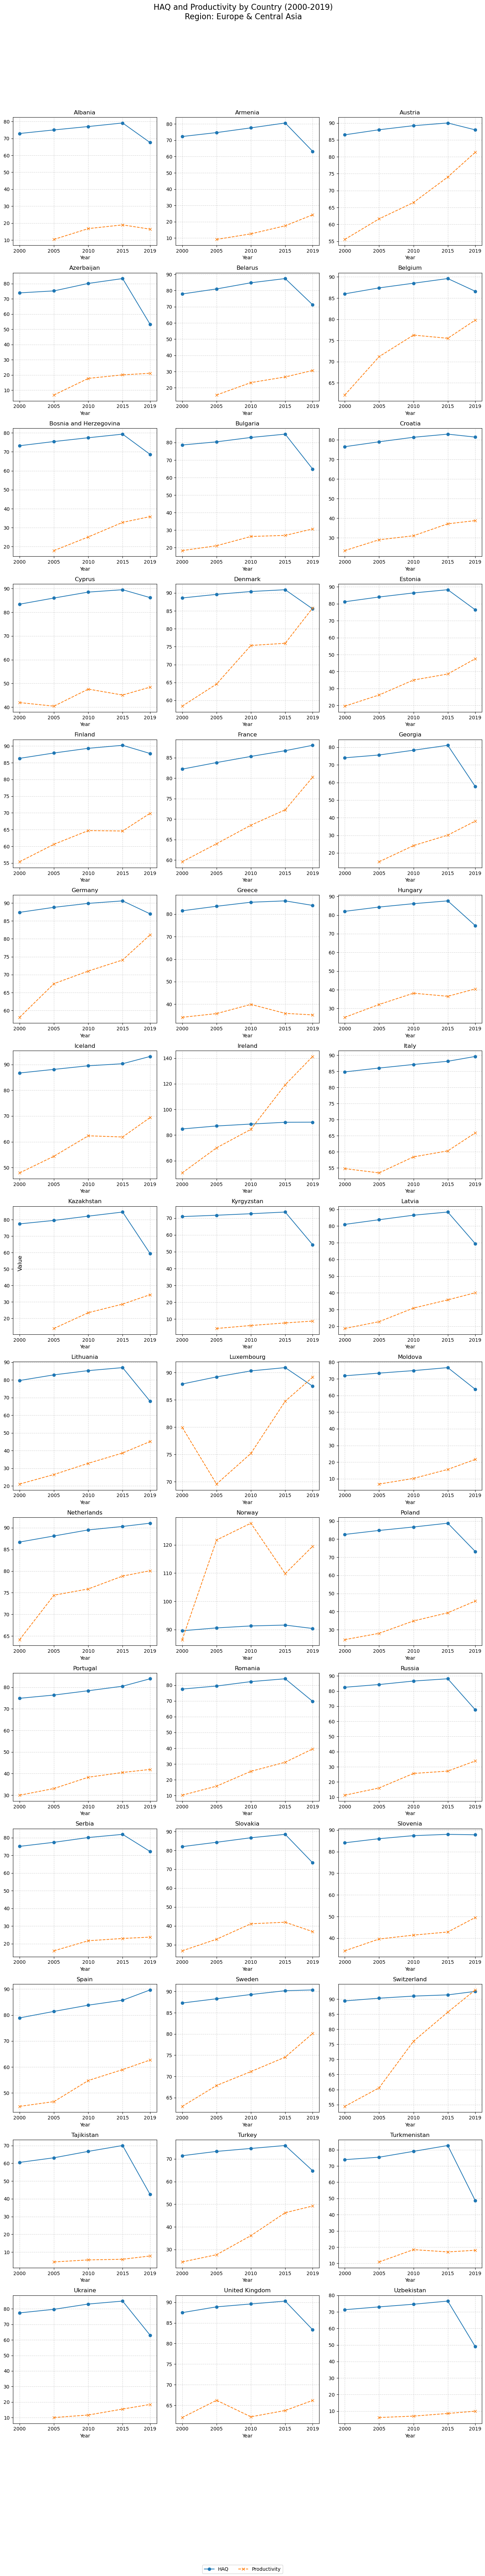

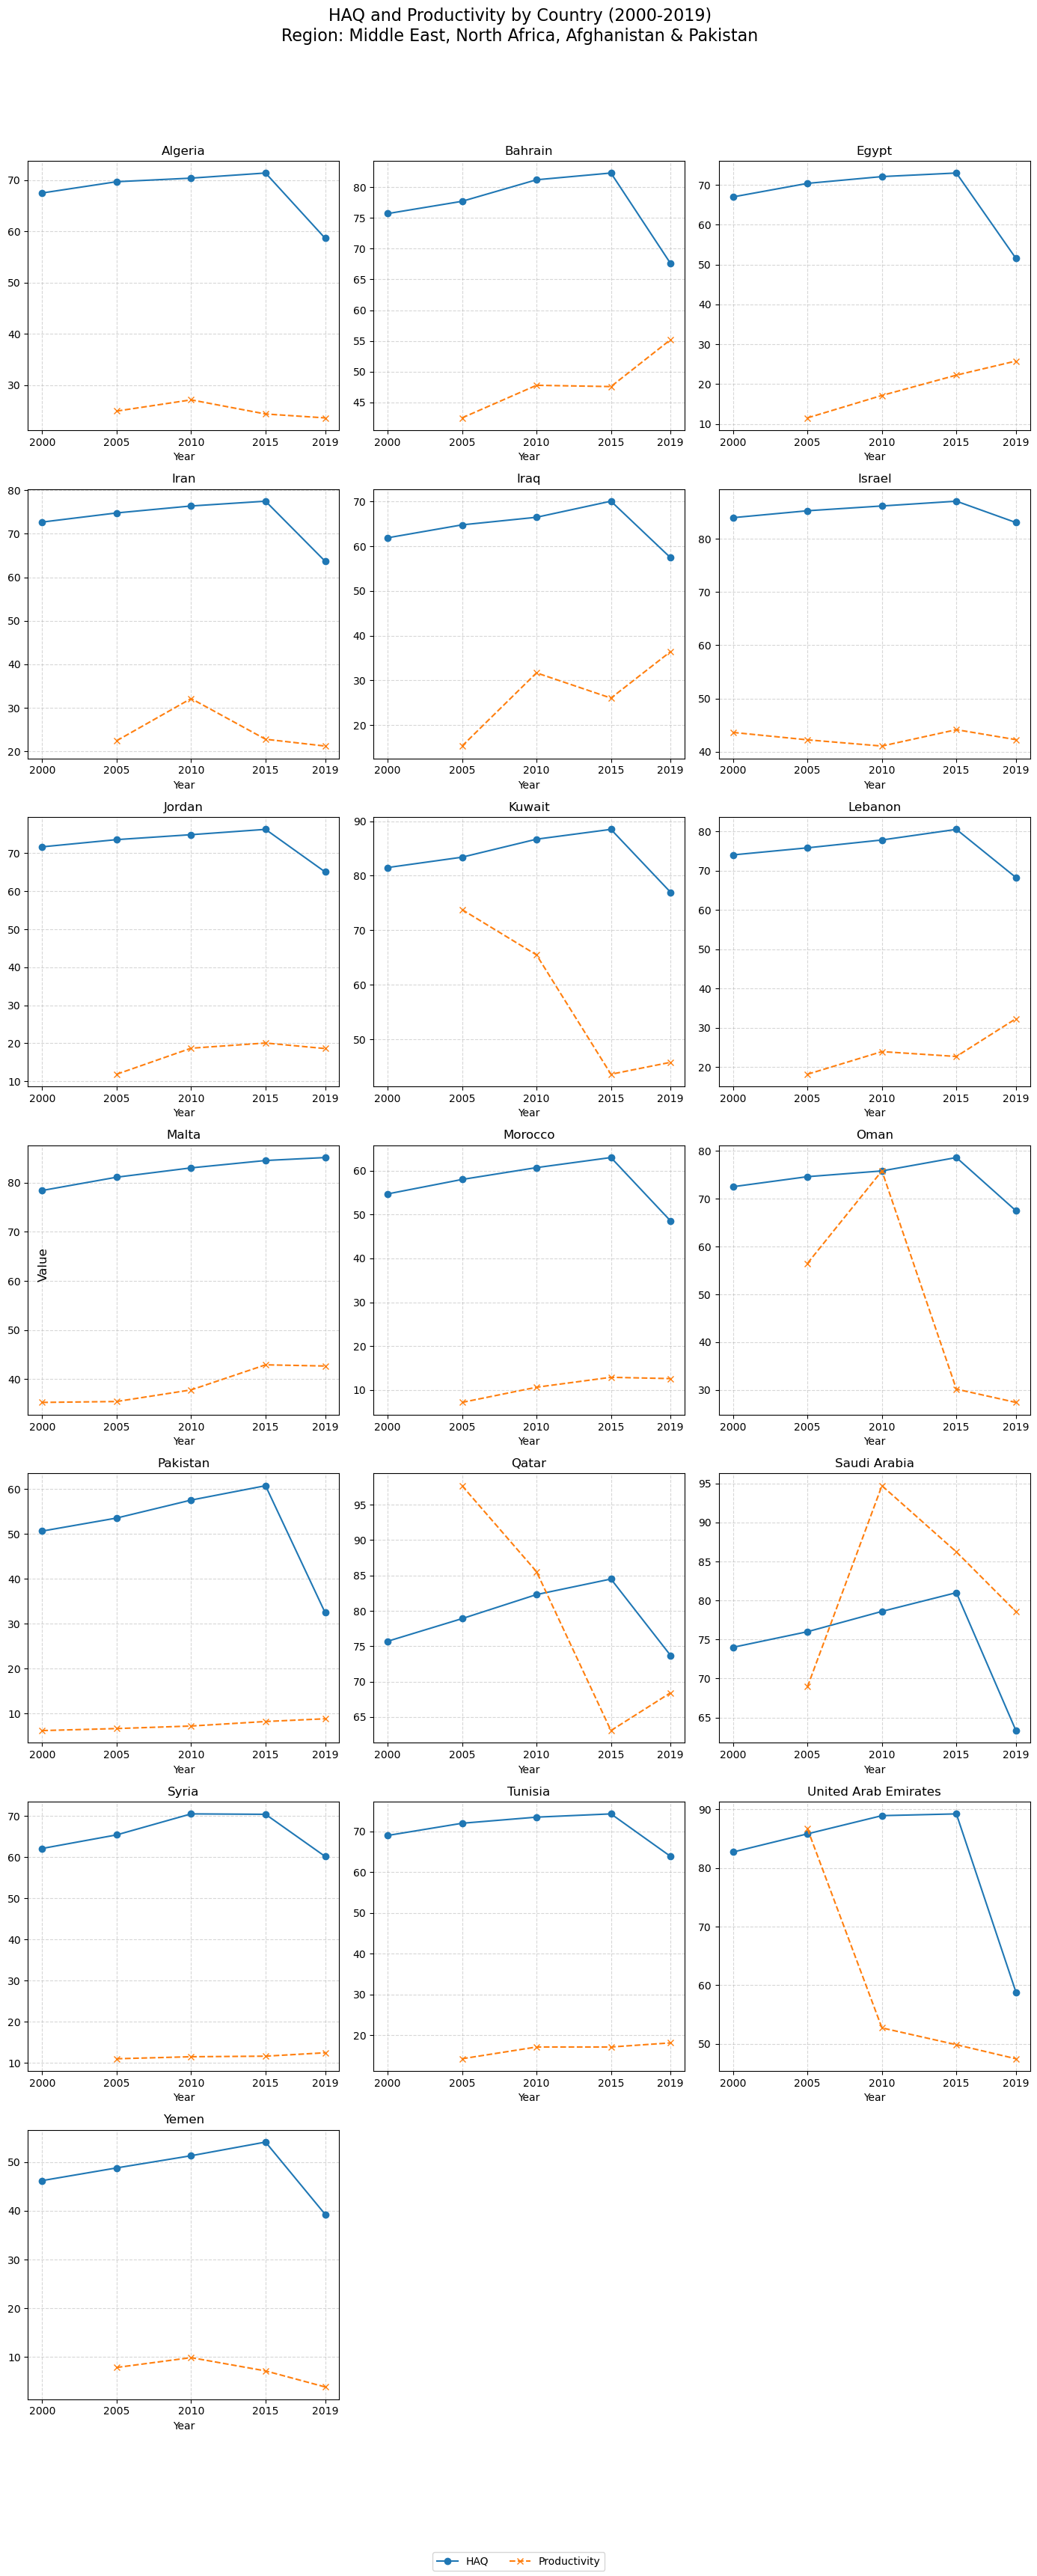

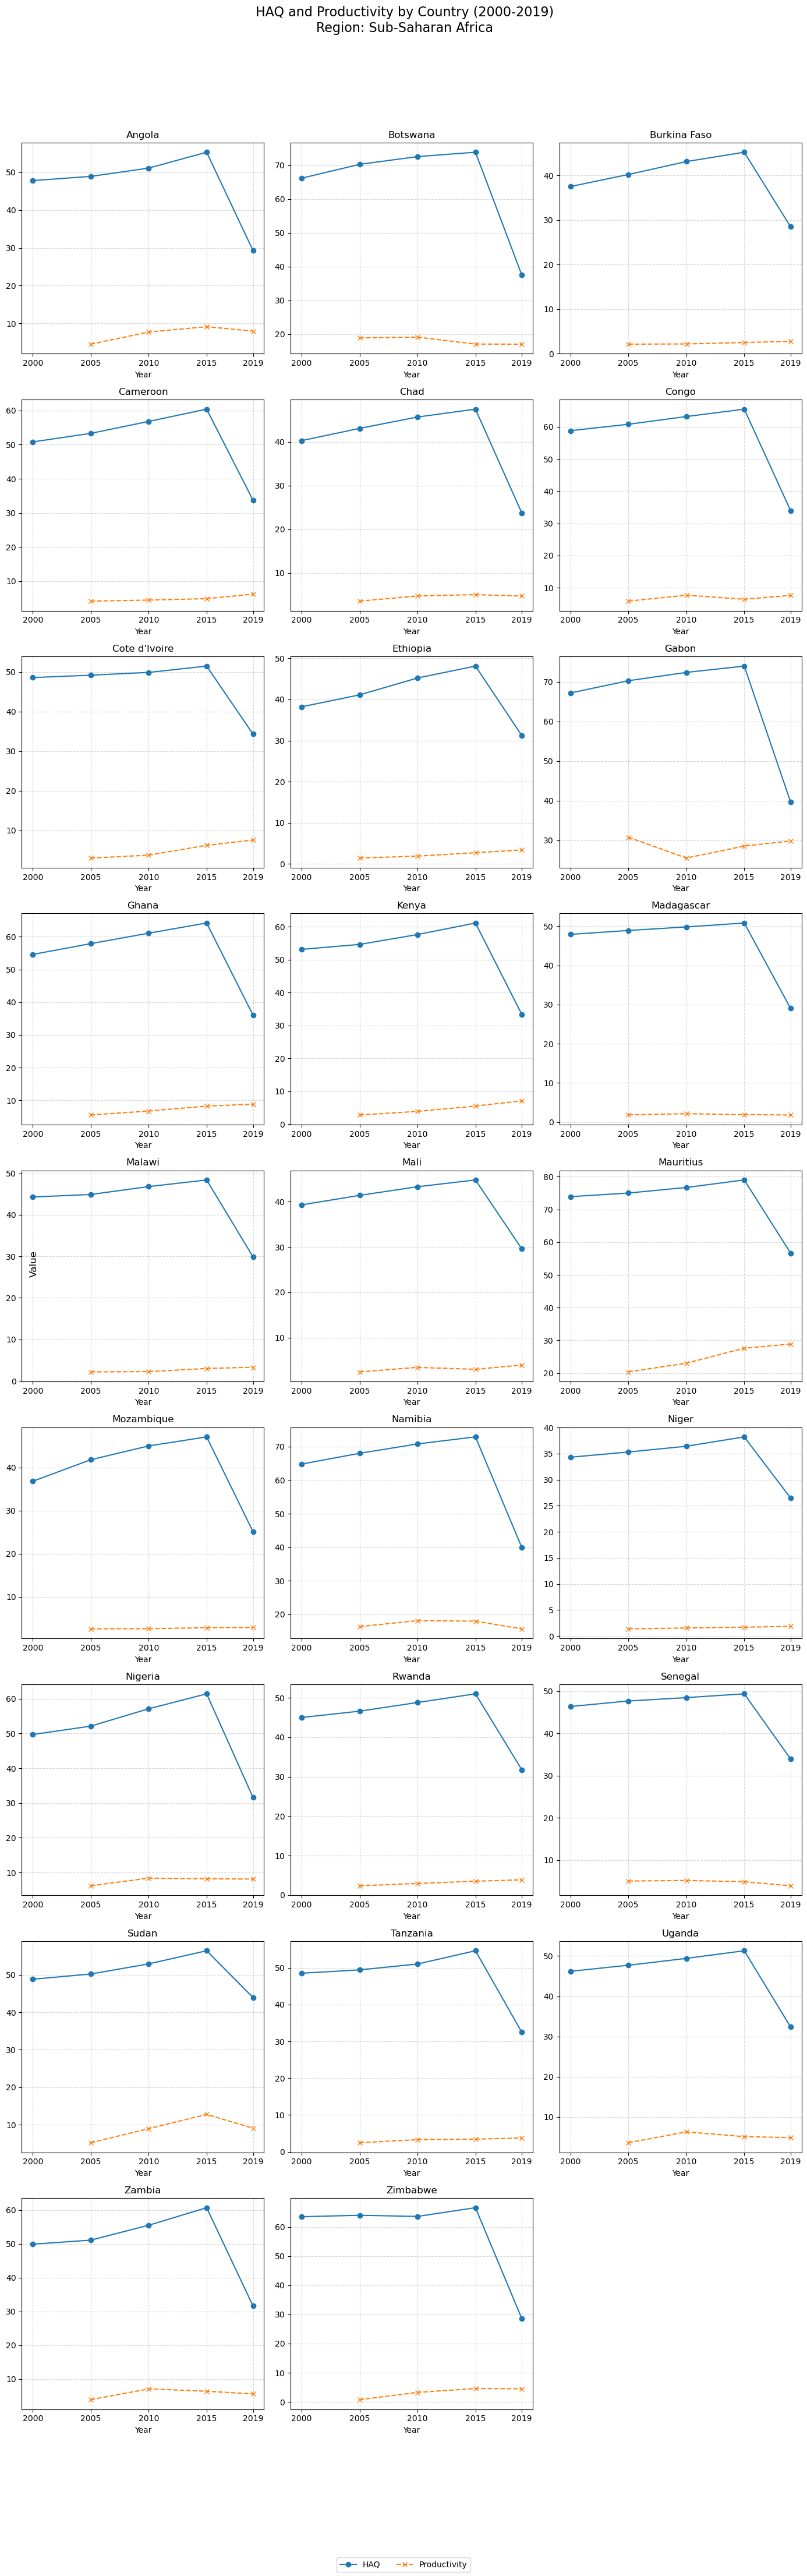

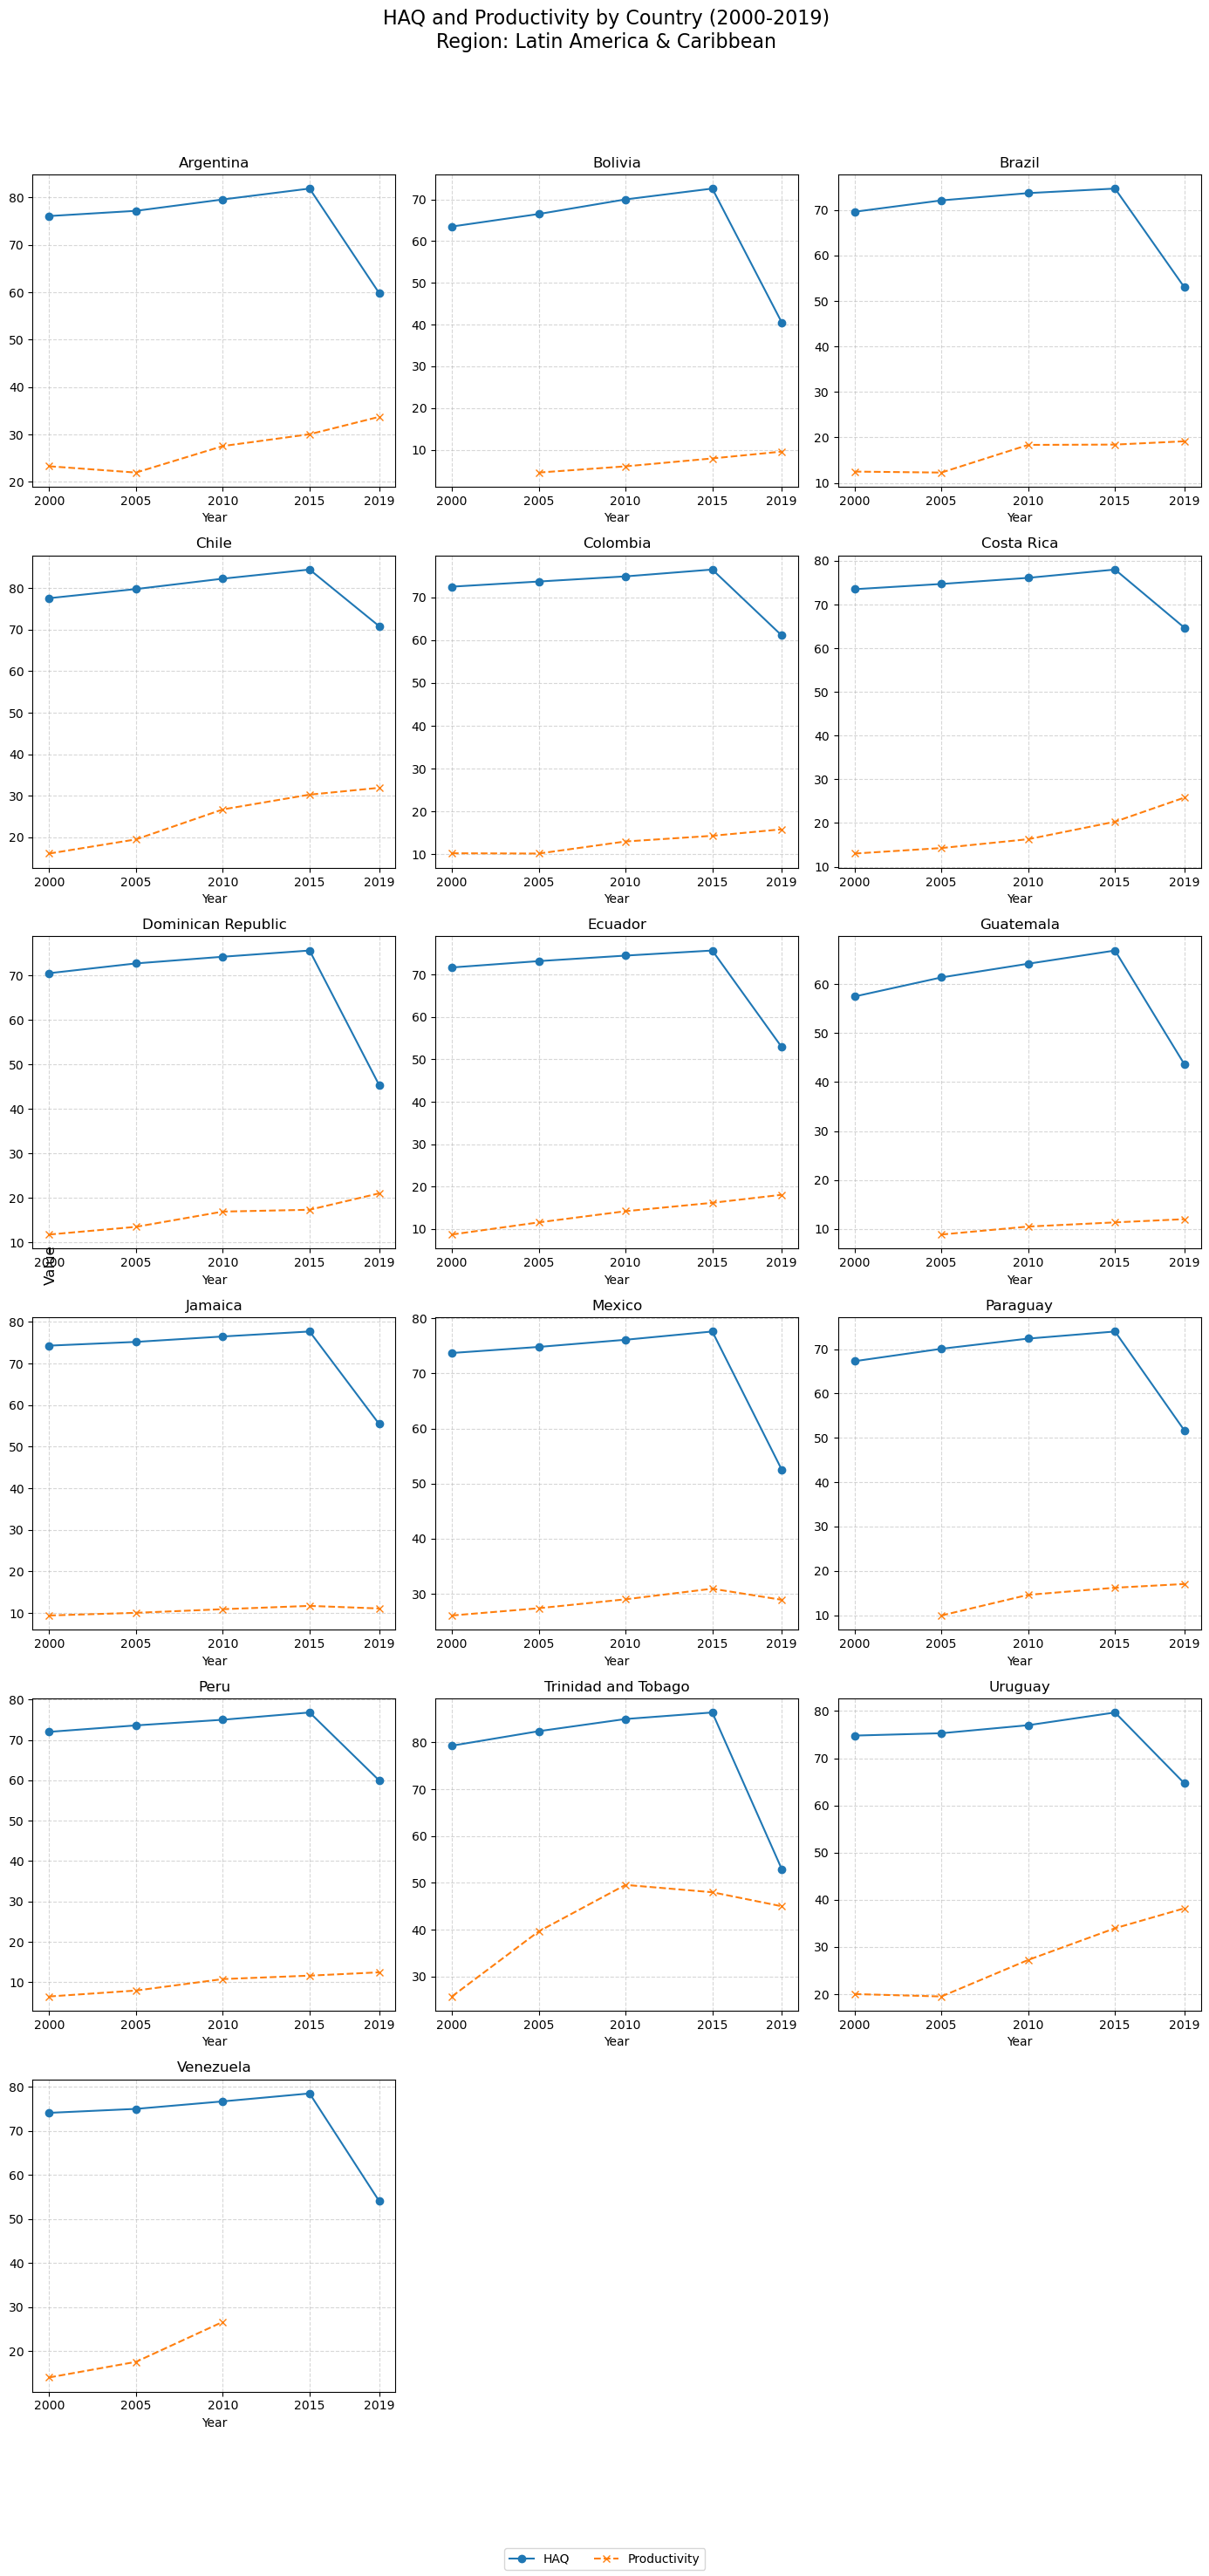

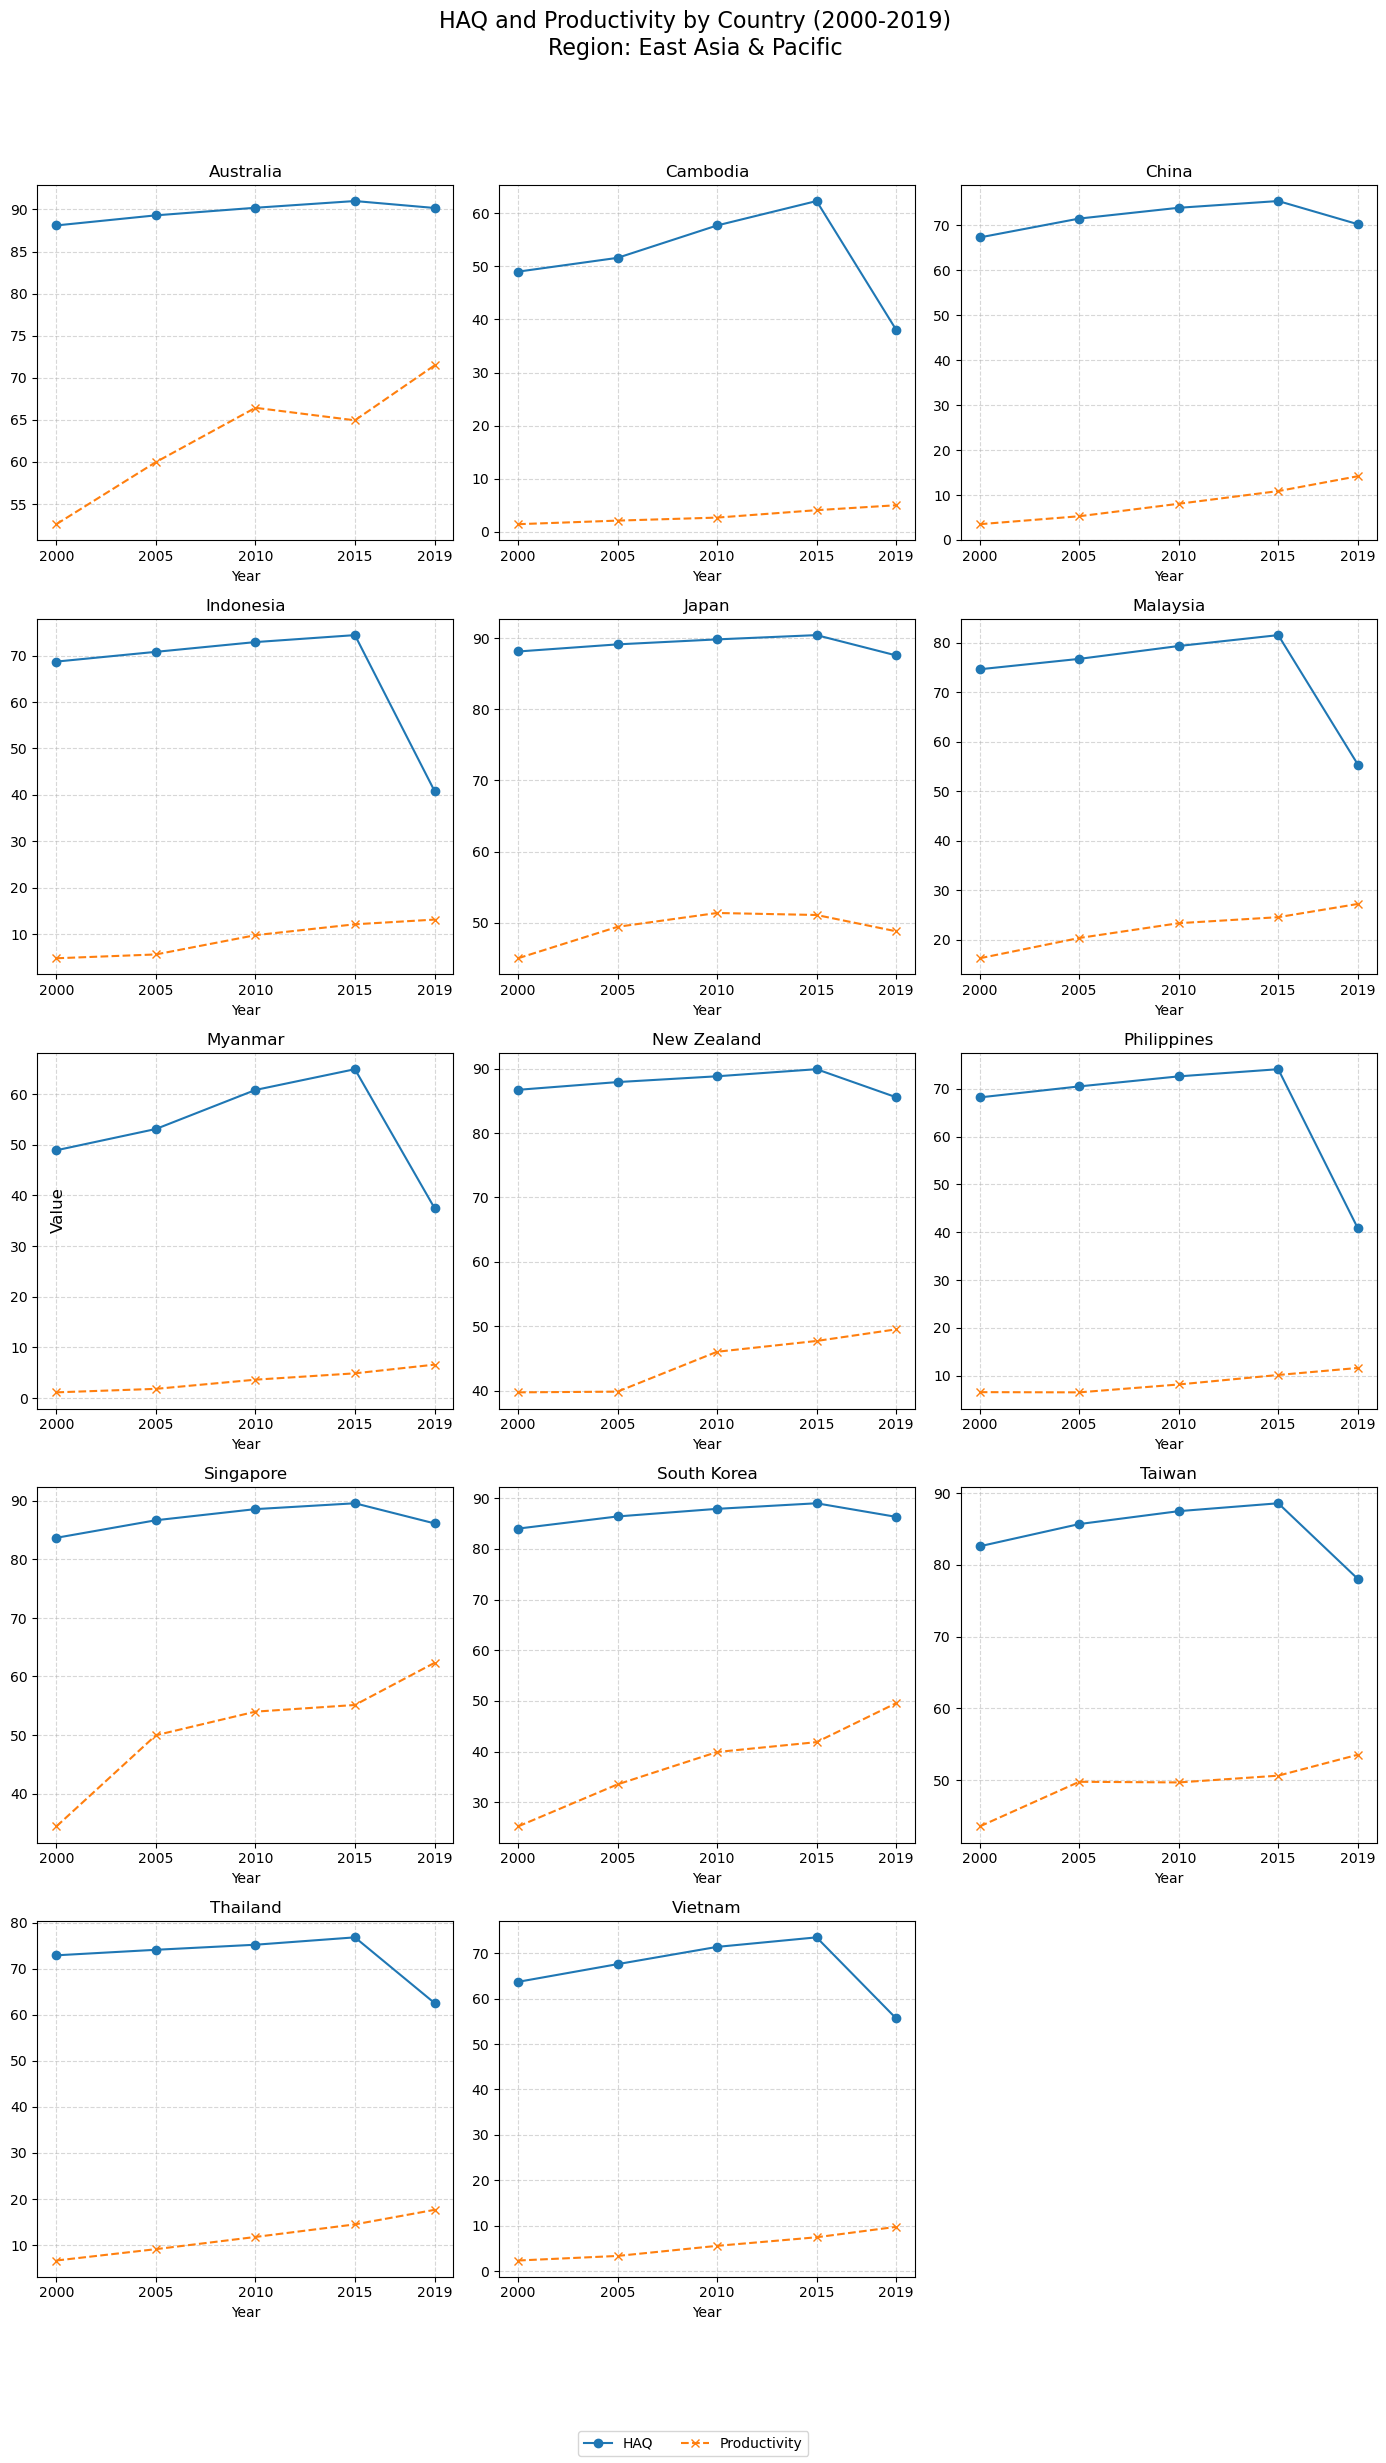

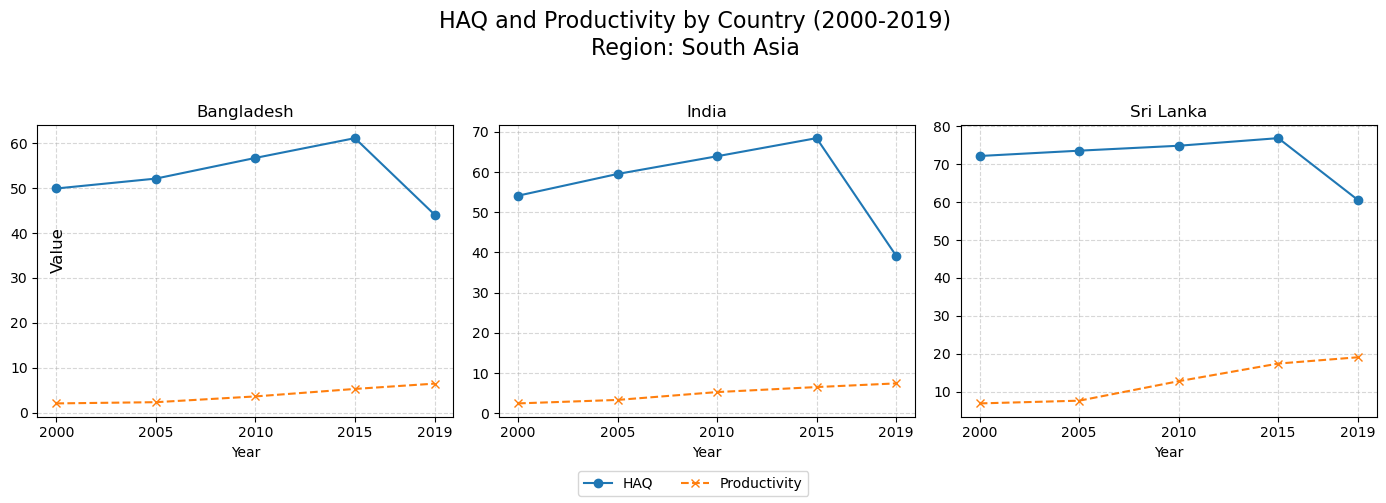

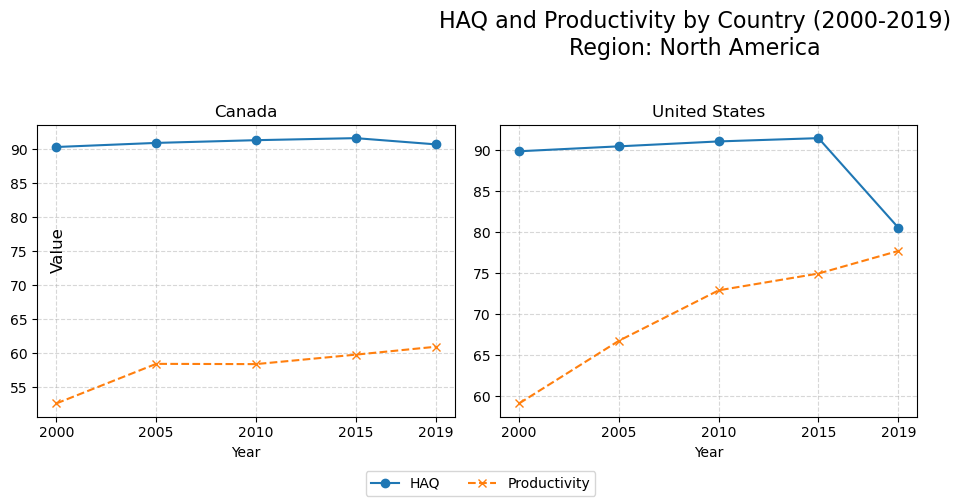

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import math

regions = df_cleaned2["Region"].unique()

for region in regions:

    # Subset for only this region
    reg = df_cleaned2[df_cleaned2["Region"] == region]

    countries = reg["Country"].unique()
    n = len(countries)

    # Determine subplot grid size (2 columns)
    ncols = 3
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 5 * nrows))
    axes = axes.flatten()  # flatten for easy iteration

    for ax, country in zip(axes, countries):
        sub = reg[reg["Country"] == country]

        # Plot HAQ
        ax.plot(sub["Year"],
                sub["Healthcare Access and Quality Index (HAQ)"],
                marker="o", label="HAQ")

        # Plot Productivity
        ax.plot(sub["Year"],
                sub["Productivity: output per hour worked"],
                marker="x", linestyle="--", label="Productivity")

        ax.set_title(country, fontsize=12)
        ax.set_xlabel("Year")
        ax.set_xticks([2000, 2005, 2010, 2015, 2019])
        ax.grid(True, linestyle="--", alpha=0.5)

    # Remove empty axes (if region has odd number of countries)
    for i in range(len(countries), len(axes)):
        fig.delaxes(axes[i])

    # Shared labels and title
    fig.text(0.04, 0.5, "Value", va="center", rotation="vertical", fontsize=12)
    fig.suptitle(f"HAQ and Productivity by Country (2000-2019)\nRegion: {region}", fontsize=16)

    # One global legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", ncol=2)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])

    # Save figure
    filename = f"Region_{region.replace(' ', '_')}_no2000wcountries2.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")

    plt.show()

    